## Customer Segmentation
- Customer segmentation is the practice of partitioning a customer base of certain organization into groups that have similar characteristics.
- In this Lab we will learn Customer Segmentation using KMeans Clustering.
- `Key Steps:`
    - Load unlabeled customer dataset
    - Apply KMeans Clustering using scikit-learn package
    - Evaluate the generated clusters.
- `Uses:`
    - Able to distinguish between customers that are providing high revenue vs low revenue
    - Distinguish between customers that are likely to churn vs not likely to churn

## Dataset
- we will use dataset of Customer Segmentation hosted on IBM Cloud object.
- [cick here to download](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv)

## Import Package

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
## Load Dataset
DATAPATH = '/'.join(os.path.abspath('').split('/')[:-3])+'/Data/Customer_Segmentation.csv'

df_cust = pd.read_csv(DATAPATH)
df_cust.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


- `Customer Id`
- `Age: ` Age of Customer
- `Edu: ` Education level of the customers
- `Years Employed: ` Number of years customer has been employed at their current job.
- `Income: ` This represent the income of the customer.
- `Card Debt: ` Amount of debt a customer has accumulated on their credit card.
- `Other Debt: ` Other types of debt apart from credit card debt such as loans or mortgages.
- `Defaulted: ` Whether the customer has defaulted on their debt payments.
- `Address: ` Customer's address
- `DebtIncomeRation: ` ration of customer's debt to income.

In [16]:
# Drop Address column
# it contains categorical data
df_cust = df_cust.drop('Address', axis=1)
# df_cust = df_cust[['Edu', 'Years Employed', 'DebtIncomeRatio']]
df_cust = df_cust[['Years Employed', 'DebtIncomeRatio']]
df_cust.head()

,Years Employed,DebtIncomeRatio
0,6,6.3
1,26,12.8
2,10,20.9
3,4,6.3
4,31,7.2


### Preprocessing
- Normalization is the process of making our features of same distributions
- We use `StandardScaler()` to normalize our dataset.
- This process is also called as Standardization.

In [5]:
from sklearn.preprocessing import StandardScaler
X = df_cust.values
X = np.nan_to_num(X) # replace nan with 0 and infinity with large values

X_norm = StandardScaler().fit_transform(X) # 0 mean and 1 variance
X_norm

array([[ 0.31212243, -0.37878978, -0.57652509],
       [-0.76634938,  2.5737211 ,  0.39138677],
       [ 0.31212243,  0.2117124 ,  1.59755385],
       ...,
       [ 2.46906604, -1.26454304,  3.45892281],
       [-0.76634938,  0.50696349, -1.08281745],
       [-0.76634938,  1.09746566, -0.2340332 ]])

## Modeling
- There is no any Target Labels in our dataset. So we will apply KMeans algorithms to get labels.
- Let us assume our KMeans cluster size K = 3.

In [6]:
k = 3
k_means = KMeans(init='k-means++', n_clusters=k)
k_means.fit(X_norm)

/home/fm-pc-lt-125/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
# get labels
labels = k_means.labels_
print(labels)

[2 1 2 2 1 1 2 0 2 1 0 2 2 2 0 2 2 0 1 1 2 0 0 1 0 2 2 1 1 2 0 1 2 0 1 2 0
 2 2 0 2 0 2 0 2 0 2 2 2 2 1 1 2 1 0 2 2 0 2 2 1 1 1 1 2 2 1 2 2 2 0 0 1 2
 2 2 2 2 1 1 1 0 0 2 1 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 0 1 2 2 1 2 2 2 0 1
 0 2 2 2 2 2 1 1 2 2 2 0 1 2 2 2 2 2 2 1 1 2 0 2 0 1 2 1 2 1 2 2 2 1 0 1 0
 2 2 1 2 0 2 2 1 1 1 2 0 2 0 1 1 2 0 0 2 2 0 1 2 0 0 1 2 1 2 2 1 2 1 2 1 0
 2 2 1 1 0 2 1 0 2 1 0 2 1 0 0 1 2 0 2 2 2 2 1 1 0 1 2 2 0 2 2 2 0 1 1 2 0
 2 0 2 2 0 2 0 1 2 1 1 2 1 2 1 2 0 2 2 1 2 2 2 1 2 1 0 0 2 0 2 2 0 2 1 2 2
 2 2 0 1 0 1 2 1 0 2 1 2 2 2 1 2 2 2 0 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 2 2
 2 2 0 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 0 2 0 2 2 1 2 2 1 1 1 1 2
 2 0 2 2 1 2 1 0 1 1 2 1 2 2 0 2 2 1 0 1 2 1 2 1 0 0 2 0 2 2 0 0 2 1 0 1 1
 2 2 1 2 2 2 2 1 2 2 2 2 0 2 1 1 1 2 2 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2 2 0 2
 1 0 2 1 1 2 2 2 1 1 2 1 2 1 0 1 2 1 1 2 2 0 2 1 2 2 0 0 2 2 2 1 1 1 2 2 1
 1 0 2 2 1 1 0 2 0 2 1 2 2 2 2 0 0 0 2 2 2 0 0 2 1 0 1 2 1 1 1 0 2 2 2 2 2
 0 2 2 2 2 1 1 2 2 2 1 1 

In [8]:
# assign labels in each row
df_cust['km_cluster'] = labels
df_cust.head()

,Edu,Years Employed,DebtIncomeRatio,km_cluster
0,2,6,6.3,2
1,1,26,12.8,1
2,2,10,20.9,2
3,2,4,6.3,2
4,1,31,7.2,1


**check centroid**  
- by averaging over unique km_cluster

In [9]:
df_cust.groupby('km_cluster').mean()

,Edu,Years Employed,DebtIncomeRatio
km_cluster,,,
0,3.390728,6.695364,10.680795
1,1.297872,17.000000,10.599149
2,1.372845,4.903017,9.789440


**get Within-Cluster Sum of Squares**

In [10]:
k_means.inertia_

1431.2888550669513

**silhouette scores**

In [11]:
silhouette_score(X_norm, labels)

0.3036358978426752

- silhouette score is 0.56 which is not that high, so let's  try with different k values to see if we can improve silhouette score.

**KMeans Clustering on Different K values**

In [135]:
k_values = range(2, 10)
wcss = []
silhouette_scores = []
cluster_assignments = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_norm, kmeans.labels_))
    cluster_assignments.append(kmeans.labels_)

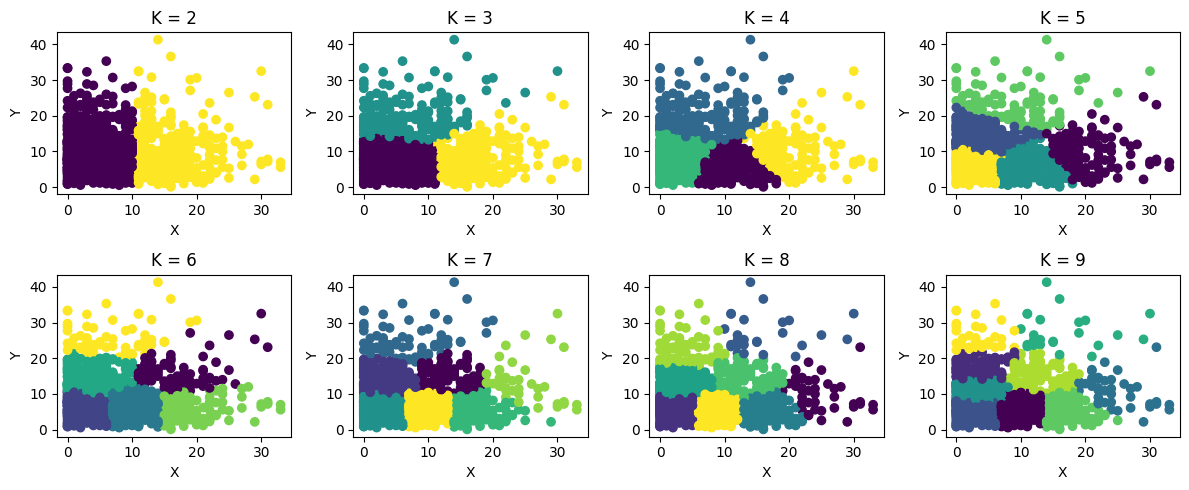

In [139]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(12, 5))
for i, clusters in enumerate(cluster_assignments, start=1):
    plt.subplot(2, 4, i)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K = {i + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()

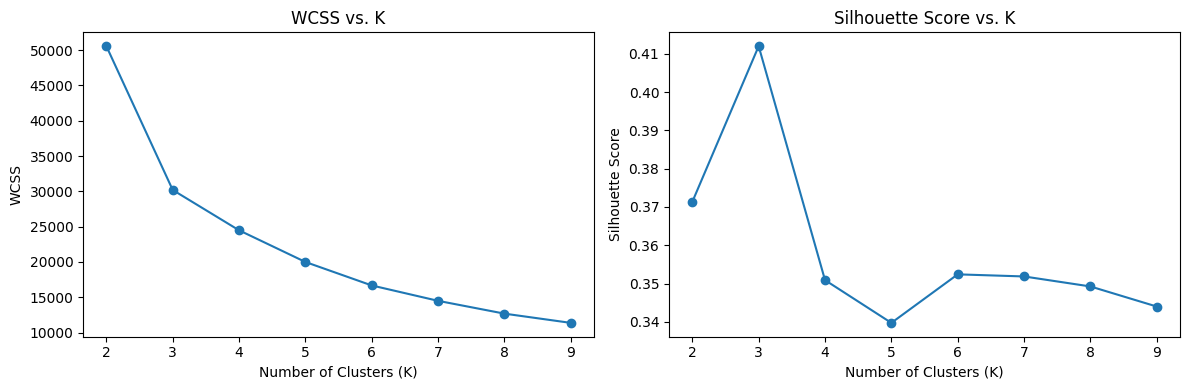

In [137]:
# Plot the WCSS and silhouette scores for different values of K
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('WCSS vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

From the above graph, we can conclude that by looking into WCSS and Slhouette Scores, optimal k value is 3.